In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
hce_data = pd.read_excel("GlobalHealthExpenditures_PerCapita.xls")
# This data is in the form of healthcare expenditure per capita in US dollars.
print(hce_data.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')


In [2]:
# Drop columns with all NA values
hce_data = hce_data.drop(['2016', '2017', '2018', '2019', '2020', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
print(hce_data.columns)

# Drop all rows where any data is missing
hce_data = hce_data.dropna()

Index(['Country Name', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')


In [3]:
countries_in_focus = ['India',
 'Nigeria',
 'Pakistan',
 'China',
 'Democratic Republic of the Congo',
 'Ethiopia',
 'Bangladesh',
 'Indonesia',
 'United Republic of Tanzania',
 'Angola',
 'Uganda',
 'Mozambique',
 'Afghanistan',
 'Niger',
 'Sudan',
 'Mali',
 'Kenya',
 'Côte d\'Ivoire',
 'Cameroon',
 'Somalia',
 'Burkina Faso',
 'Chad',
 'Philippines',
 'Myanmar',
 'South Africa',
 'Brazil',
 'Egypt',
 'Ghana',
 'Malawi',
 'Yemen',
 'Zambia',
 'Madagascar',
 'Guinea',
 'Mexico',
 'South Sudan',
 'Sierra Leone',
 'Benin',
 'Zimbabwe',
 'Iraq',
 'Nepal',
 'Senegal',
 'Viet Nam',
 'Burundi',
 'United States of America',
 'Turkey',
 'Rwanda',
 'Iran (Islamic Republic of)',
 'Central African Republic',
 'Haiti',
 'Uzbekistan']

countries_in_focus = sorted(countries_in_focus)

In [4]:
cn = hce_data['Country Name']

def intersection(l1, l2):
    return list(set(l1) & set(l2))

common_countries = sorted(intersection(countries_in_focus, cn))
print(len(common_countries))
print(common_countries)

47
['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Brazil', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'China', "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Egypt', 'Ethiopia', 'Ghana', 'Guinea', 'Haiti', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Kenya', 'Madagascar', 'Malawi', 'Mali', 'Mexico', 'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Philippines', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Turkey', 'Uganda', 'United Republic of Tanzania', 'United States of America', 'Uzbekistan', 'Viet Nam', 'Yemen', 'Zambia']


In [5]:
hce_data_filtered = hce_data[hce_data['Country Name'].isin(common_countries)]
hce_data_filtered.shape

(47, 17)

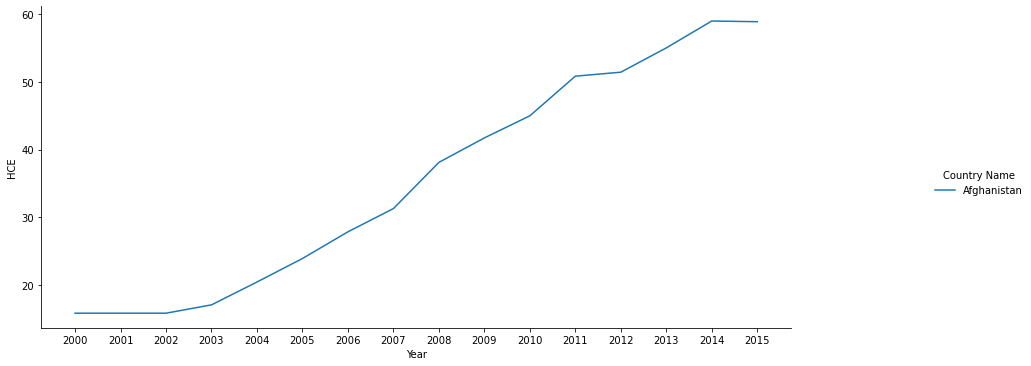

In [6]:
test = hce_data_filtered[hce_data_filtered['Country Name'] == 'Afghanistan']
test = test.melt(id_vars = ['Country Name'], var_name = 'Year', value_name = 'HCE')
test

g = sns.relplot(x = 'Year', y = 'HCE', hue = "Country Name", kind = "line", data = test)
g.fig.set_size_inches(15,5)
plt.show()

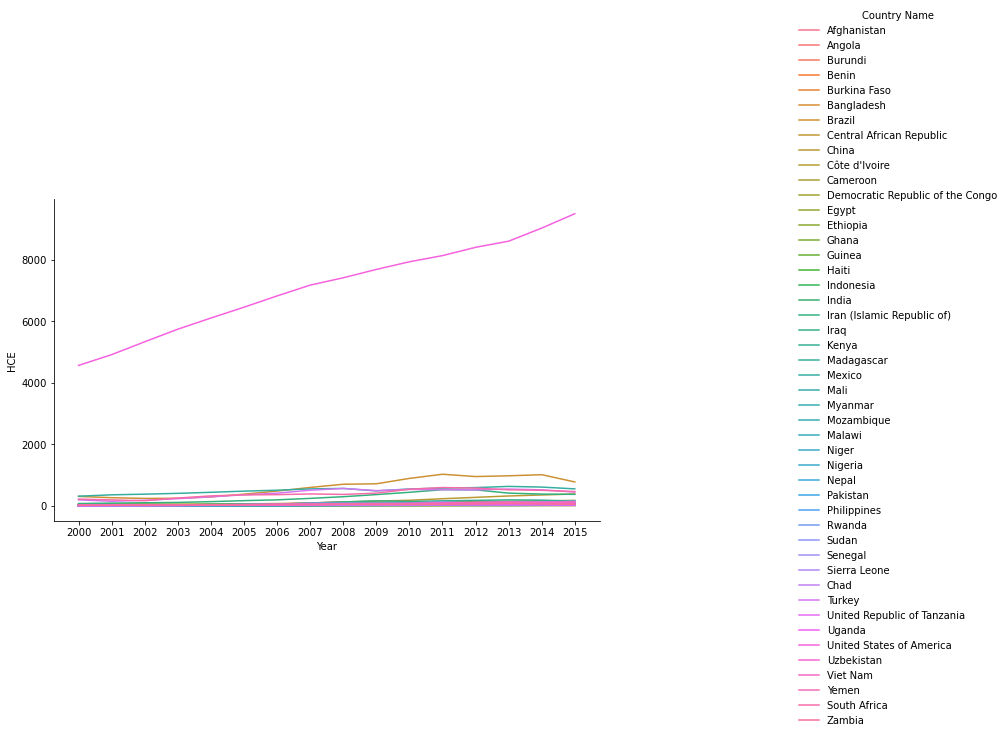

In [7]:
melted_hce_data_filtered = hce_data_filtered.melt(id_vars = ['Country Name'], var_name = 'Year', value_name = 'HCE')
melted_hce_data_filtered

g = sns.relplot(x = 'Year', y = 'HCE', hue = "Country Name", kind = "line", data = melted_hce_data_filtered)
g.fig.set_size_inches(15,5)
plt.show()